In [16]:
!pip install adjustText


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
deg_females_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_>80.csv", index_col=0)

deg_females_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_70-80.csv", index_col=0)

deg_females_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_50-70.csv", index_col=0)

deg_females_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_30-50.csv", index_col=0)

deg_males_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_>80.csv", index_col=0)

deg_males_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_70-80.csv", index_col=0)

deg_males_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_50-70.csv", index_col=0)

deg_males_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_30-50.csv", index_col=0)

In [7]:
import anndata as ad
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [20]:
symbol_mapping.index

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000284332.1', 'ENSG00000237613.2',
       'ENSG00000268020.3', 'ENSG00000240361.2', 'ENSG00000186092.6',
       'ENSG00000238009.6',
       ...
       'ENSG00000273739.1', 'ENSG00000276700.1', 'ENSG00000276312.1',
       'ENSG00000275757.1', 'ENSG00000278573.1', 'ENSG00000276017.1',
       'ENSG00000278817.1', 'ENSG00000277196.4', 'ENSG00000278625.1',
       'ENSG00000277374.1'],
      dtype='object', name='ensembl_id', length=58780)

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3268685146.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3268685146.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/3268685146.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

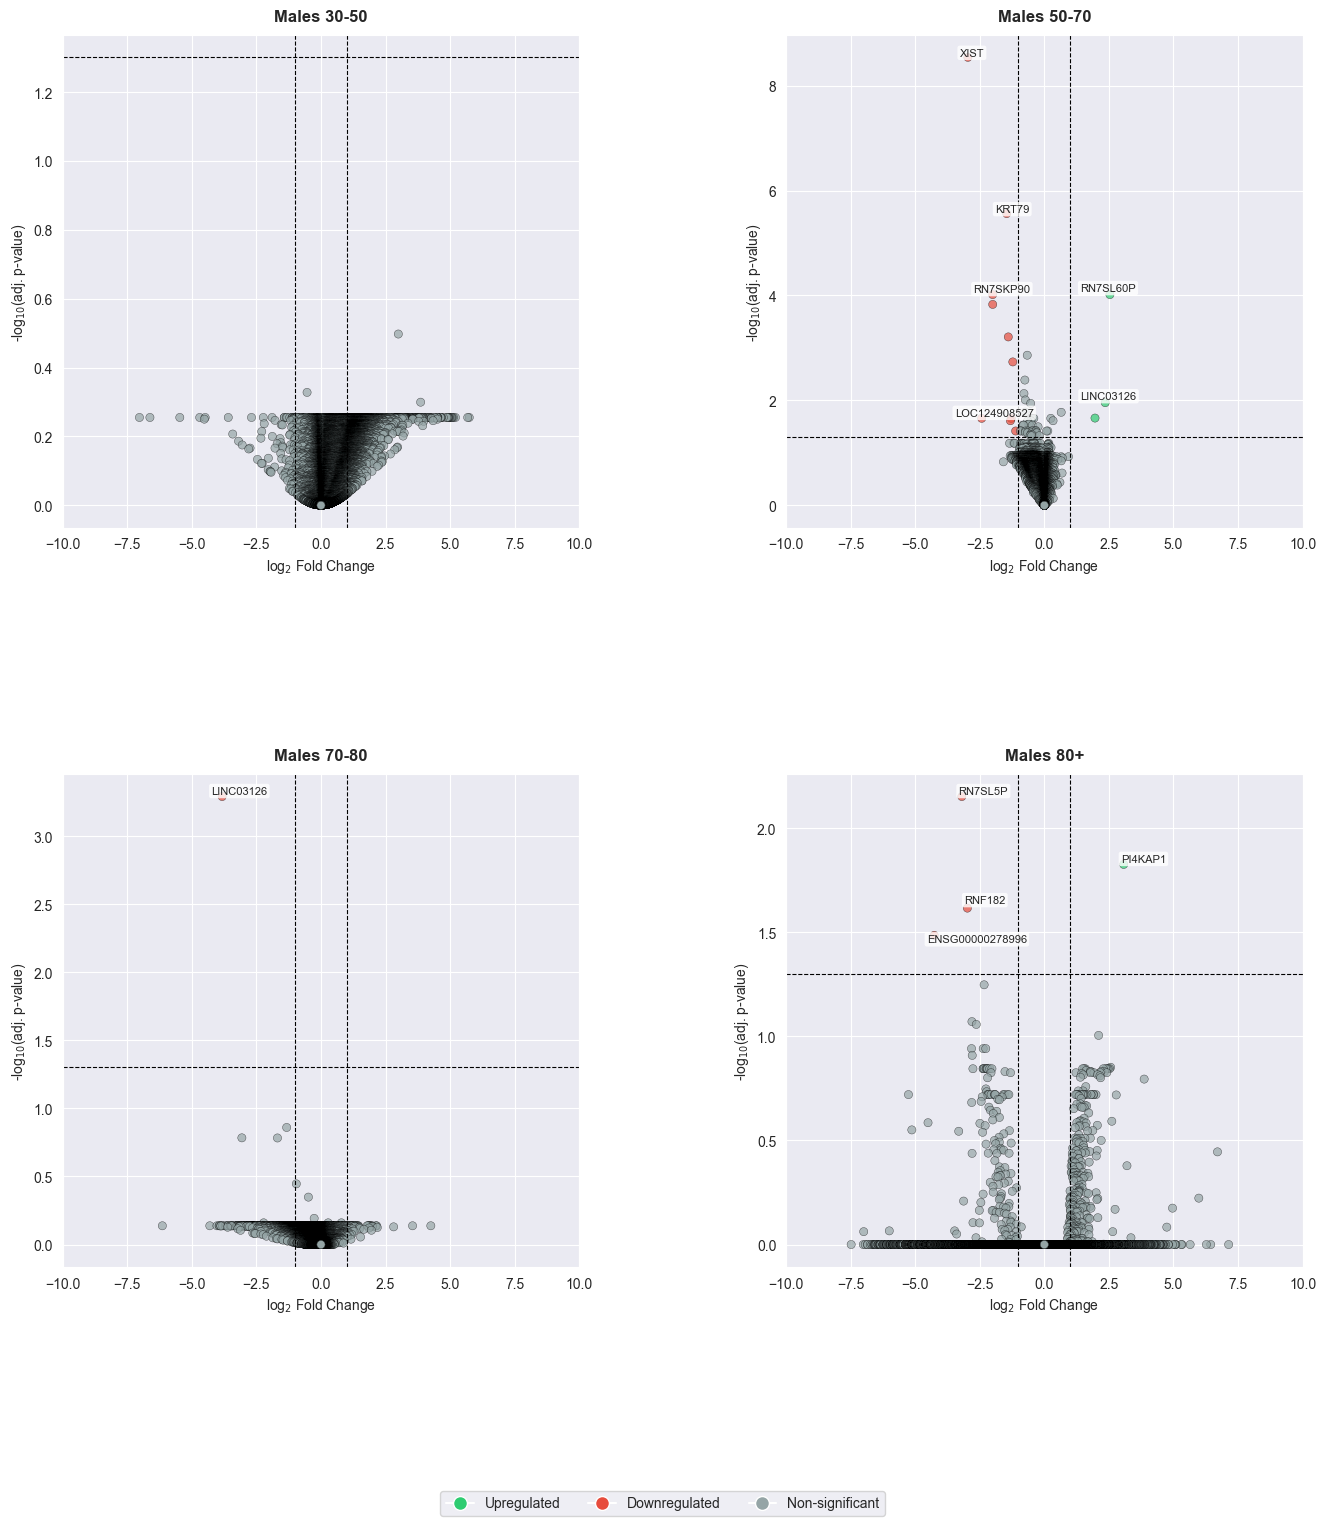


Extreme upregulated genes (>10 FC) by age group:

30-50 (6 genes):
                    gene_symbol  log2FoldChange          padj
Gene                                                         
ENSG00000239808.3     RN7SL255P       25.675006  2.576973e-12
ENSG00000253703.2      IGHV1-68       21.976052  1.177013e-14
ENSG00000262259.1     MTND4LP24       19.962450  1.947120e-06
ENSG00000276540.1     REXO1L10P       17.499452  2.066306e-04
ENSG00000225287.1      OFD1P13Y       14.207984  4.885081e-02
ENSG00000212191.1  LOC124900186       10.166479  5.556550e-01

50-70 (1 genes):
                    gene_symbol  log2FoldChange  padj
Gene                                                 
ENSG00000278591.1  LOC124904144       24.254103   NaN

70-80 (5 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000231930.1  ENSG00000231930       29.909668  6.369407e-15
ENSG00000274959.1  ENSG00000274959       26

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] < padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(padj)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] < 1e-4) |
        (sig_df['log2FoldChange'].abs() > 2) |
        (sig_df['gene_symbol'].isin(important_genes))
    ].sort_values(['significance', 'padj']).head(25)

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(padj)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.3),
               expand_points=(1.5, 1.5),
               expand_text=(1.2, 1.2),
               force_text=(0.3, 0.5),
               ax=ax)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(adj. p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1.0
point_size = 35
alpha_value = 0.7
important_genes = {'SNCA', 'MAPT', 'LRRK2', 'GBA'}

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_males_30_50, "Males 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_males_50_70, "Males 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_males_70_80, "Males 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_males_over_80, "Males 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1739118885.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1739118885.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_16589/1739118885.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

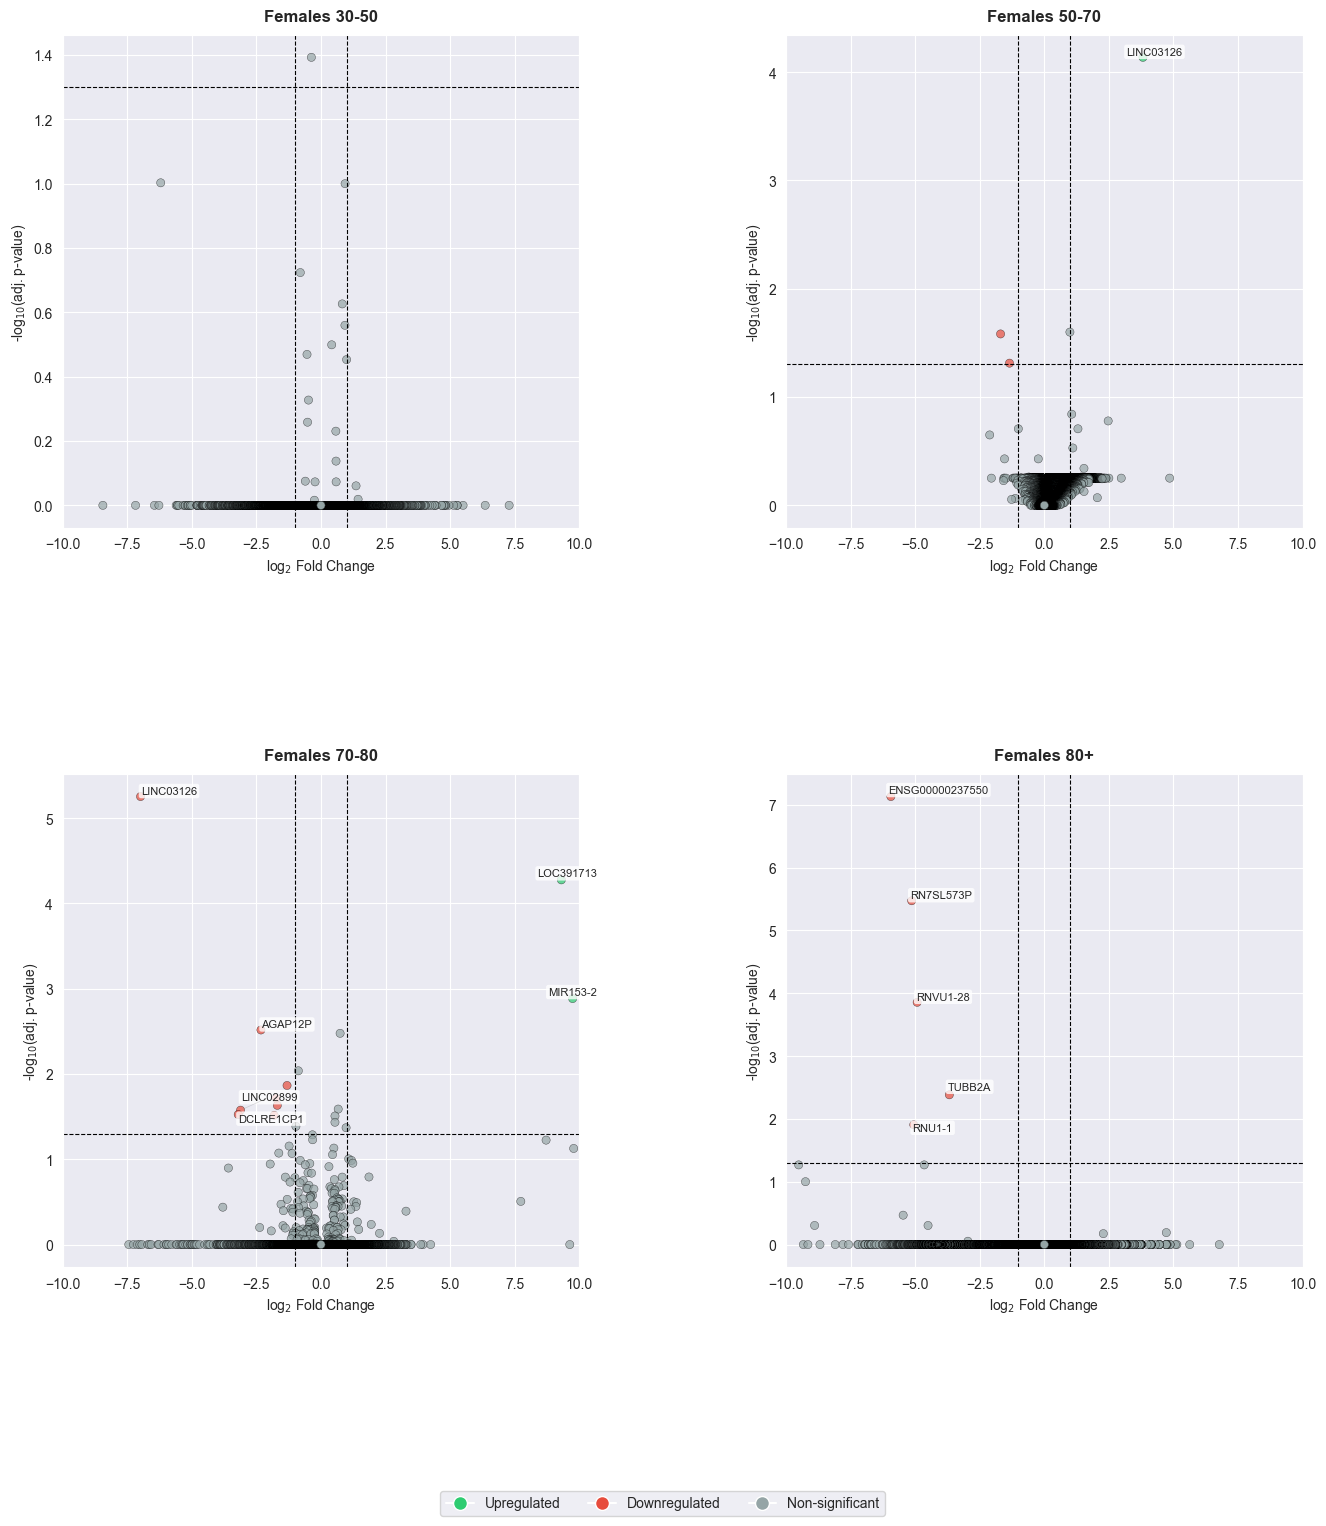


Extreme upregulated genes (>10 FC) by age group:

30-50 (108 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000275414.1  ENSG00000275414       30.000000  2.125265e-12
ENSG00000248417.1  ENSG00000248417       30.000000  2.125265e-12
ENSG00000258170.1  ENSG00000258170       30.000000  2.125265e-12
ENSG00000238003.1          RPL10P4       29.999860  2.125265e-12
ENSG00000212424.1        RNU1-119P       29.999860  2.125265e-12
...                            ...             ...           ...
ENSG00000201827.1  ENSG00000201827       12.569901  3.094489e-01
ENSG00000251936.1        RNA5SP249       12.569901  3.094489e-01
ENSG00000206650.1         SNORA70G       12.569901  3.094489e-01
ENSG00000260335.1  ENSG00000260335       11.845011  5.891533e-01
ENSG00000184724.5         KRTAP6-1       10.966877  9.999969e-01

[108 rows x 3 columns]

50-70 (0 genes):
Empty DataFrame
Columns: [gene_symbol, log2

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_females = {}
extreme_downregulated_females = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_females[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_females[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] < padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(padj)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] < 1e-4) |
        (sig_df['log2FoldChange'].abs() > 2) |
        (sig_df['gene_symbol'].isin(important_genes))
    ].sort_values(['significance', 'padj']).head(25)

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(padj)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.3),
               expand_points=(1.5, 1.5),
               expand_text=(1.2, 1.2),
               force_text=(0.3, 0.5),
               ax=ax)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(adj. p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1.0
point_size = 35
alpha_value = 0.7
important_genes = {'SNCA', 'MAPT', 'LRRK2', 'GBA'}

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_females_30_50, "Females 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_females_50_70, "Females 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_females_70_80, "Females 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_females_over_80, "Females 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_females.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_females.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))